In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Sanskar\Downloads\banksim dAtaset.csv")
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
data.describe()
#data symm or not?

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [5]:
#Checking for absurd values
data['step'].unique

<bound method Series.unique of 0           0
1           0
2           0
3           0
4           0
         ... 
594638    179
594639    179
594640    179
594641    179
594642    179
Name: step, Length: 594643, dtype: int64>

In [6]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+4000, y[i], ha = 'center')

In [7]:
def addlabels_1(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+4000, y[i], ha = 'center',rotation=90)

Text(0.5, 1.0, 'Fraud frequency')

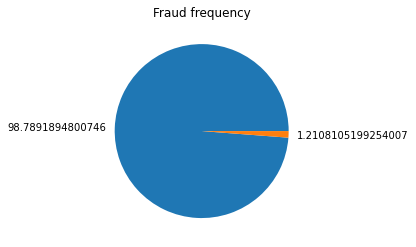

In [8]:
plt.pie(data["fraud"].value_counts(),labels=[587443*100/(587443+7200),7200*100/(587443+7200)])
plt.title("Fraud frequency")

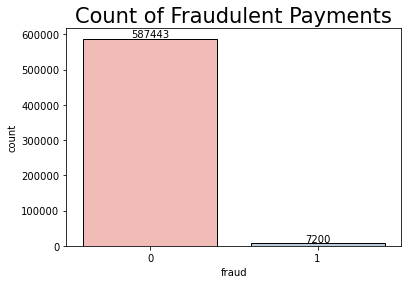

In [9]:
sns.countplot(x="fraud",data=data,edgecolor="black",palette="Pastel1")
plt.title("Count of Fraudulent Payments",fontsize=21)
addlabels(["0","1"],data.fraud.value_counts())
plt.show()

In [10]:
df1=pd.DataFrame(data['category'].value_counts())
df1

,category
'es_transportation',505119
'es_food',26254
'es_health',16133
'es_wellnessandbeauty',15086
'es_fashion',6454
'es_barsandrestaurants',6373
'es_hyper',6098
'es_sportsandtoys',4002
'es_tech',2370
'es_home',1986


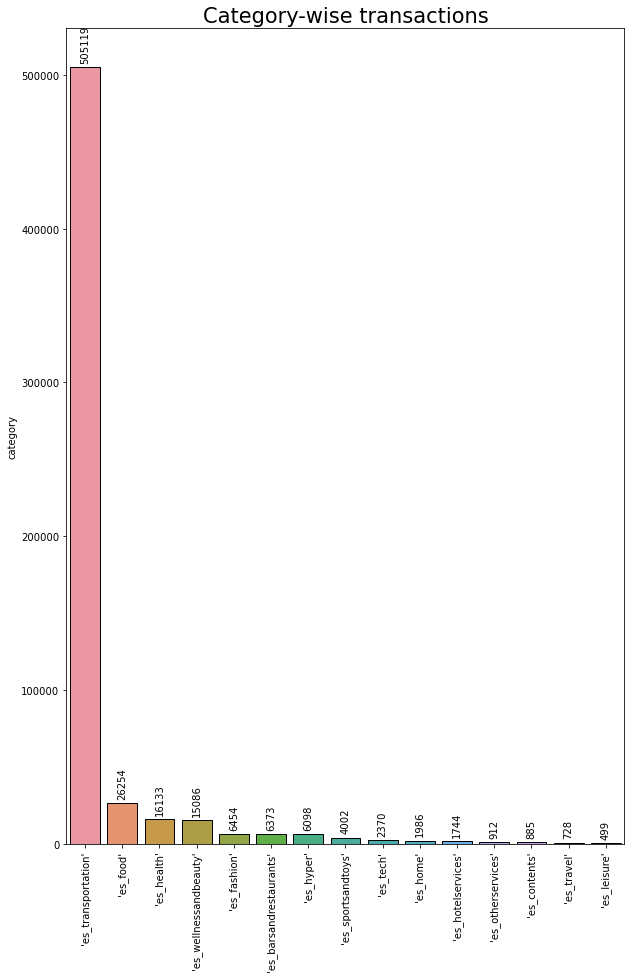

In [11]:
plt.figure(figsize=(10,15))
sns.barplot(df1.index,df1.category,data=df1,ec="black")
plt.title("Category-wise transactions",fontsize=21)
plt.xticks(rotation=90)
addlabels_1(df1.index,df1.category)

In [12]:
df2=pd.DataFrame(data['gender'].value_counts())
df2

,gender
'F',324565
'M',268385
'E',1178
'U',515


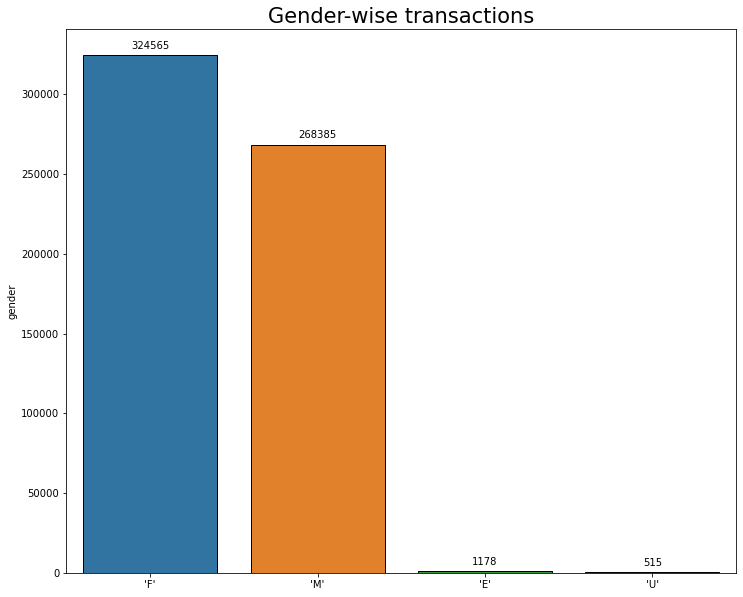

In [13]:
plt.figure(figsize=(12,10))
sns.barplot(df2.index,df2.gender,data=df2,ec="black")
plt.title("Gender-wise transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels(df2.index,df2.gender)

In [14]:
df3=pd.DataFrame(data['age'].value_counts())
df3

,age
'2',187310
'3',147131
'4',109025
'5',62642
'1',58131
'6',26774
'0',2452
'U',1178


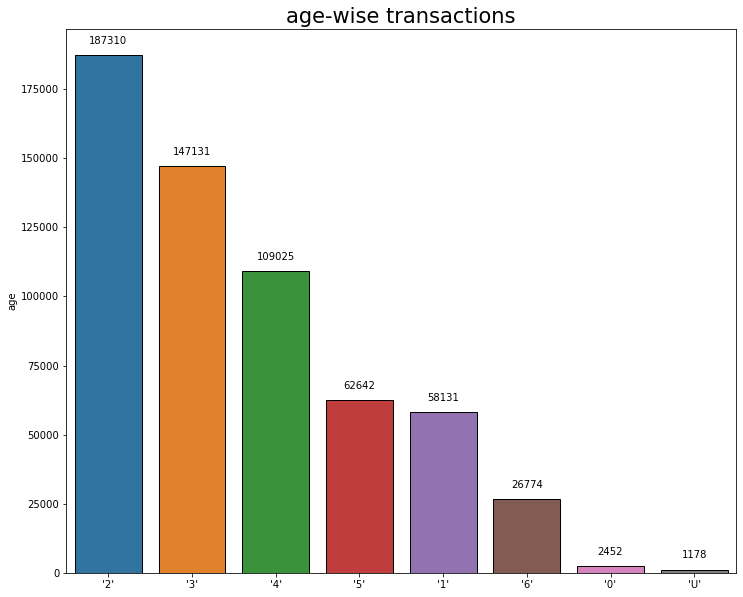

In [15]:
plt.figure(figsize=(12,10))
sns.barplot(df3.index,df3.age,data=df3,ec="black")
plt.title("age-wise transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels(df3.index,df3.age)

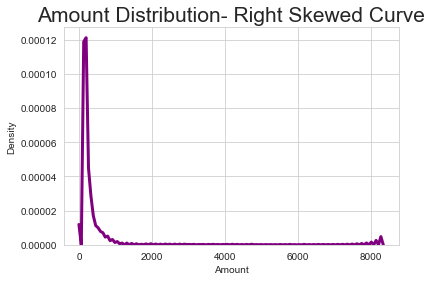

In [16]:
sns.set_style('whitegrid')
sns.distplot(data['amount'], hist=False, kde = True, color ='purple', kde_kws = {'linewidth': 3}, bins = 7)
plt.title("Amount Distribution- Right Skewed Curve",fontsize=21)
plt.xlabel("Amount")
plt.ylabel("Density")
plt.show()

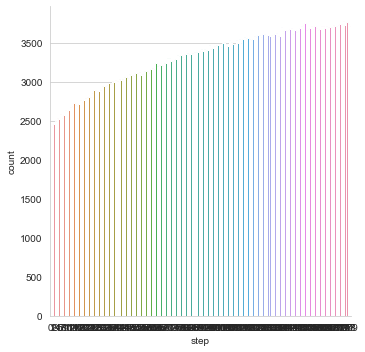

In [17]:
sns.catplot(data=data,x='step',kind='count') #there is no relationship between time and number of fraud cases

Text(0.5, 1.0, 'Boxplot: Category V/S Amount')

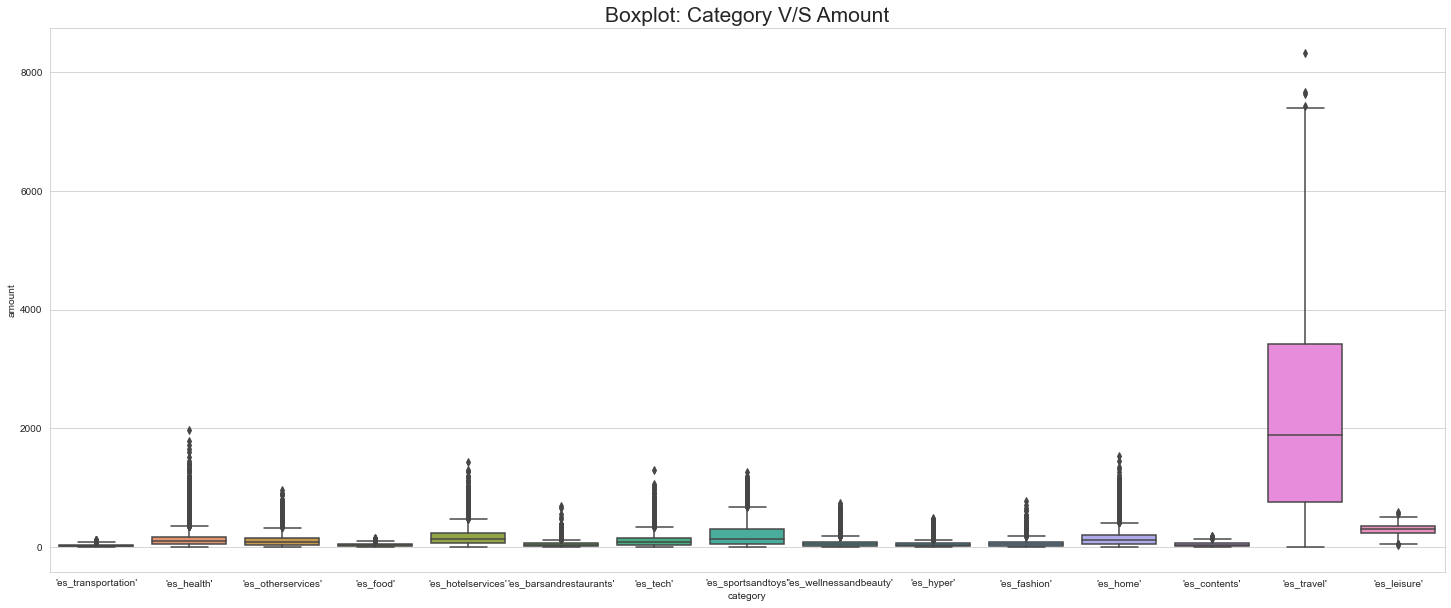

In [18]:
plt.subplots(figsize=(25,10))
sns.boxplot(x=data.category,y=data.amount,data=data)
plt.title("Boxplot: Category V/S Amount", fontsize=21)

In [19]:
data=data.drop(['zipcodeOri', 'zipMerchant'], axis = 1)

In [20]:
# Create two dataframes with fraud and non-fraud data 
data_fraud = data.loc[data.fraud == 1] 
data_nonfraud = data.loc[data.fraud == 0]

Text(0.5, 1.0, 'Boxplot: Category V/S Amount (for fraud)')

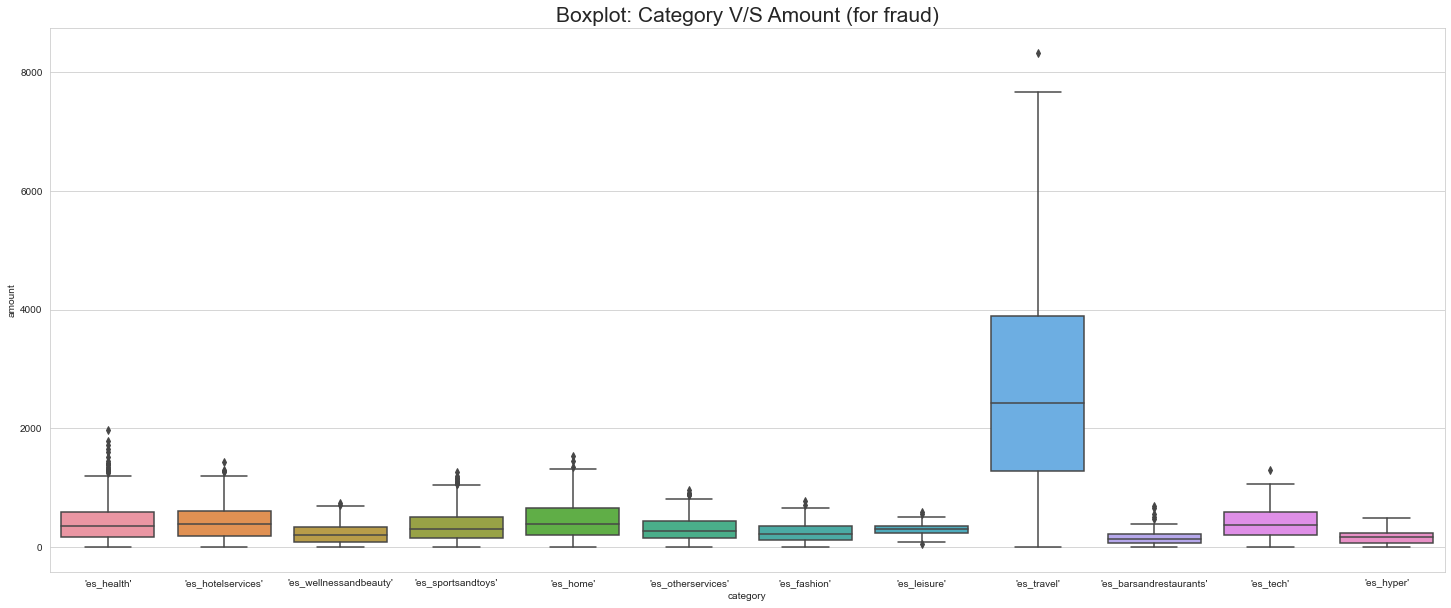

In [21]:
plt.subplots(figsize=(25,10))
sns.boxplot(x=data_fraud.category,y=data_fraud.amount)
plt.title("Boxplot: Category V/S Amount (for fraud)", fontsize=21)

In [22]:
df4=pd.DataFrame(data_fraud['category'].value_counts())
df4

,category
'es_sportsandtoys',1982
'es_health',1696
'es_wellnessandbeauty',718
'es_travel',578
'es_hotelservices',548
'es_leisure',474
'es_home',302
'es_hyper',280
'es_otherservices',228
'es_tech',158


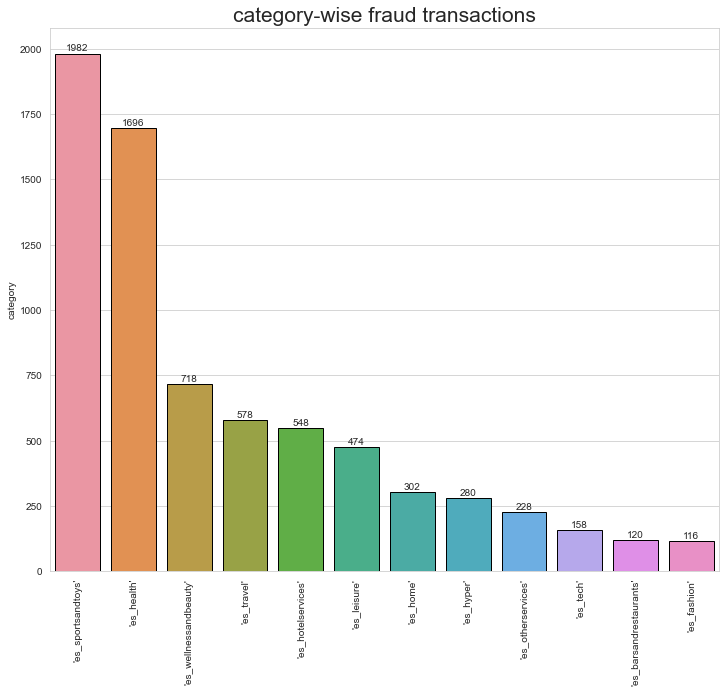

In [23]:
plt.figure(figsize=(12,10))
sns.barplot(df4.index,df4.category,data=df4,ec="black")
plt.title("category-wise fraud transactions",fontsize=21)
plt.xticks(rotation=90)
def addlabels_2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10, y[i], ha = 'center')
addlabels_2(df4.index,df4.category)

In [24]:
df5=pd.DataFrame(data_nonfraud['category'].value_counts())
df5

,category
'es_transportation',505119
'es_food',26254
'es_health',14437
'es_wellnessandbeauty',14368
'es_fashion',6338
'es_barsandrestaurants',6253
'es_hyper',5818
'es_tech',2212
'es_sportsandtoys',2020
'es_home',1684


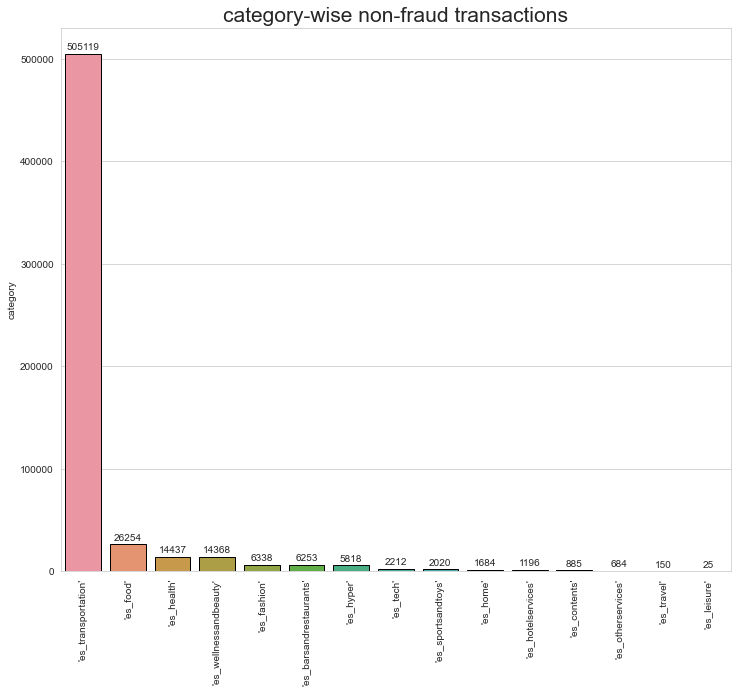

In [25]:
plt.figure(figsize=(12,10))
sns.barplot(df5.index,df5.category,data=df5,ec="black")
plt.title("category-wise non-fraud transactions",fontsize=21)
plt.xticks(rotation=90)
addlabels(df5.index,df5.category)

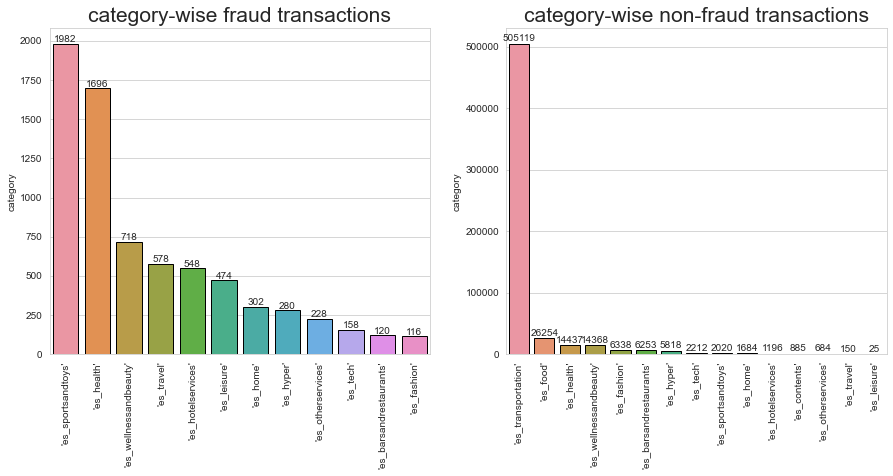

In [106]:
f = plt.figure(figsize=(15,6))
f.add_subplot(121)
sns.barplot(df4.index,df4.category,data=df4,ec="black")
plt.title("category-wise fraud transactions",fontsize=21)
plt.xticks(rotation=90)
def addlabels_2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10, y[i], ha = 'center')
addlabels_2(df4.index,df4.category)
f.add_subplot(122)
sns.barplot(df5.index,df5.category,data=df5,ec="black")
plt.title("category-wise non-fraud transactions",fontsize=21)
plt.xticks(rotation=90)
addlabels(df5.index,df5.category)

In [26]:
df6=pd.DataFrame(data_fraud['gender'].value_counts())
df6

,gender
'F',4758
'M',2435
'E',7


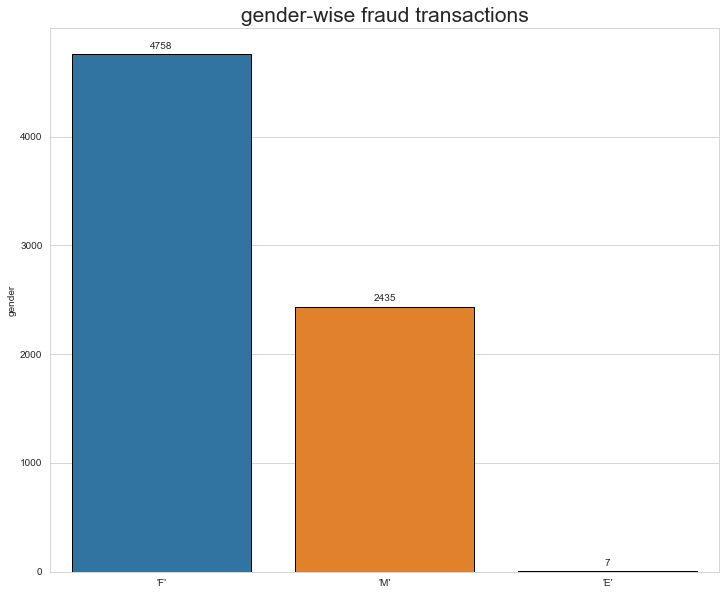

In [27]:
plt.figure(figsize=(12,10))
sns.barplot(df6.index,df6.gender,data=df6,ec="black")
plt.title("gender-wise fraud transactions",fontsize=21)
def addlabels_3(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+50, y[i], ha = 'center')
addlabels_3(df6.index,df6.gender)

In [28]:
df7=pd.DataFrame(data_nonfraud['gender'].value_counts())
df7

,gender
'F',319807
'M',265950
'E',1171
'U',515


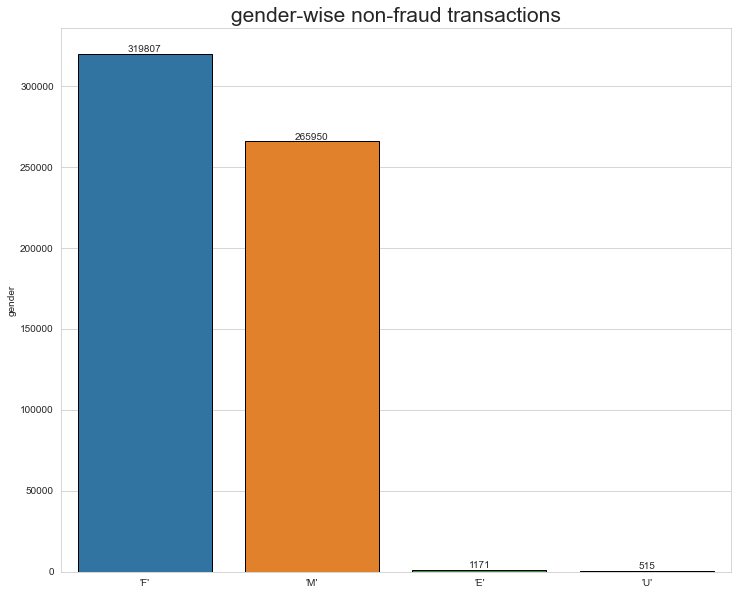

In [29]:
plt.figure(figsize=(12,10))
sns.barplot(df7.index,df7.gender,data=df7,ec="black")
plt.title("gender-wise non-fraud transactions",fontsize=21)
plt.xticks(rotation=0)
def addlabels_4(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1000, y[i], ha = 'center')
addlabels_4(df7.index,df7.gender)


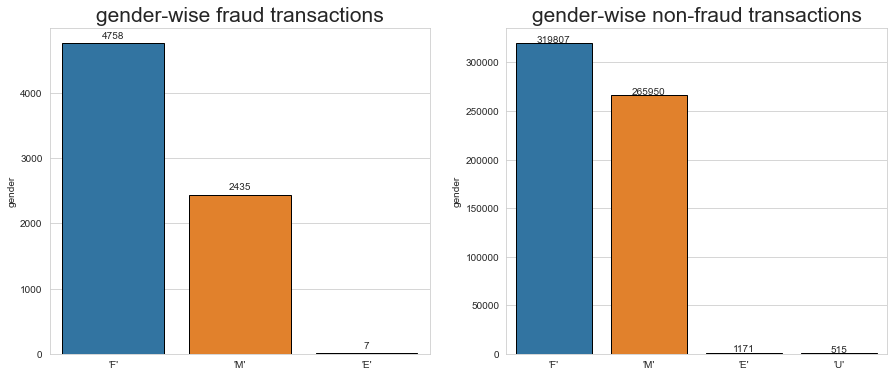

In [110]:
f = plt.figure(figsize=(15,6))
f.add_subplot(121)
sns.barplot(df6.index,df6.gender,data=df6,ec="black")
plt.title("gender-wise fraud transactions",fontsize=21)
def addlabels_3(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+80, y[i], ha = 'center')
addlabels_3(df6.index,df6.gender)
f.add_subplot(122)
sns.barplot(df7.index,df7.gender,data=df7,ec="black")
plt.title("gender-wise non-fraud transactions",fontsize=21)
plt.xticks(rotation=0)
def addlabels_4(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1000, y[i], ha = 'center')
addlabels_4(df7.index,df7.gender)

In [30]:
df8=pd.DataFrame(data_fraud['age'].value_counts())
df8

,age
'2',2344
'3',1755
'4',1410
'1',689
'5',686
'6',261
'0',48
'U',7


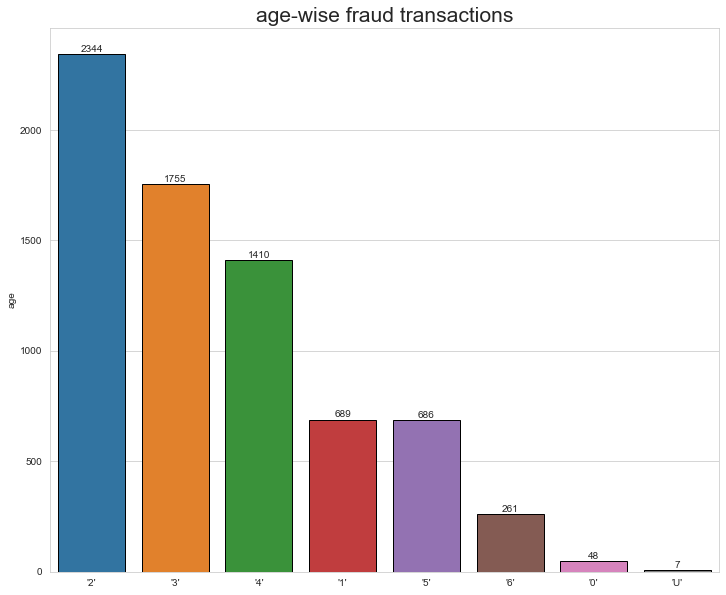

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(df8.index,df8.age,data=df8,ec="black")
plt.title("age-wise fraud transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels_2(df8.index,df8.age)

In [32]:
df9=pd.DataFrame(data_nonfraud['age'].value_counts())
df9

,age
'2',184966
'3',145376
'4',107615
'5',61956
'1',57442
'6',26513
'0',2404
'U',1171


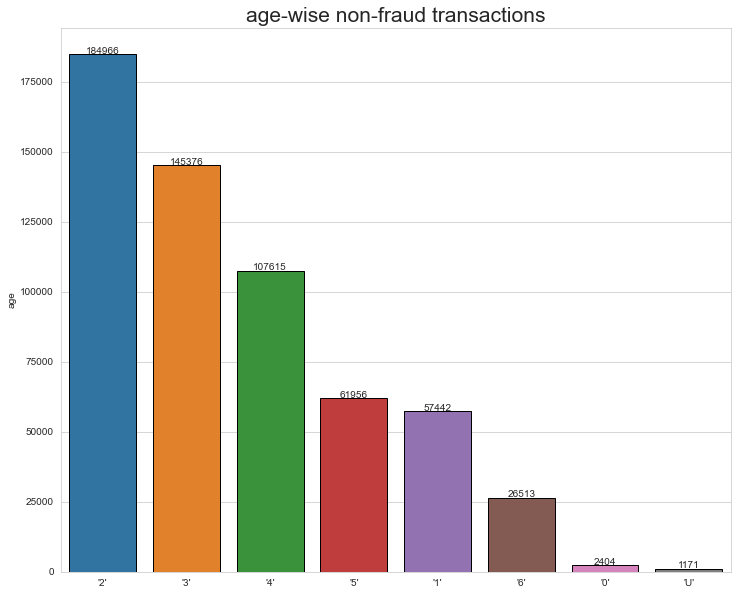

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(df9.index,df9.age,data=df9,ec="black")
plt.title("age-wise non-fraud transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels_3(df9.index,df9.age)

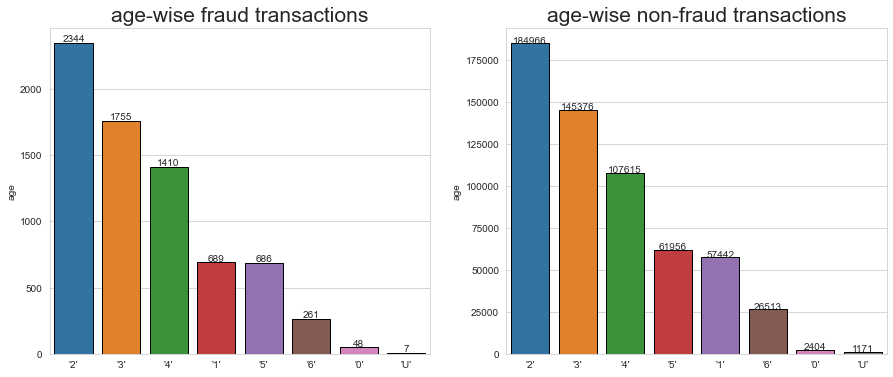

In [111]:
f = plt.figure(figsize=(15,6))
f.add_subplot(121)
sns.barplot(df8.index,df8.age,data=df8,ec="black")
plt.title("age-wise fraud transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels_2(df8.index,df8.age)
f.add_subplot(122)
sns.barplot(df9.index,df9.age,data=df9,ec="black")
plt.title("age-wise non-fraud transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels_3(df9.index,df9.age)

In [34]:
df10=pd.DataFrame(data.groupby('category')['amount','fraud'].mean())
df10

<ipython-input-34-f1dc311c51b4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df10=pd.DataFrame(data.groupby('category')['amount','fraud'].mean())


,amount,fraud
category,,
'es_barsandrestaurants',43.461014,0.018829
'es_contents',44.547571,0.000000
'es_fashion',65.666642,0.017973
'es_food',37.070405,0.000000
'es_health',135.621367,0.105126
'es_home',165.670846,0.152064
'es_hotelservices',205.614249,0.314220
'es_hyper',45.970421,0.045917
'es_leisure',288.911303,0.949900


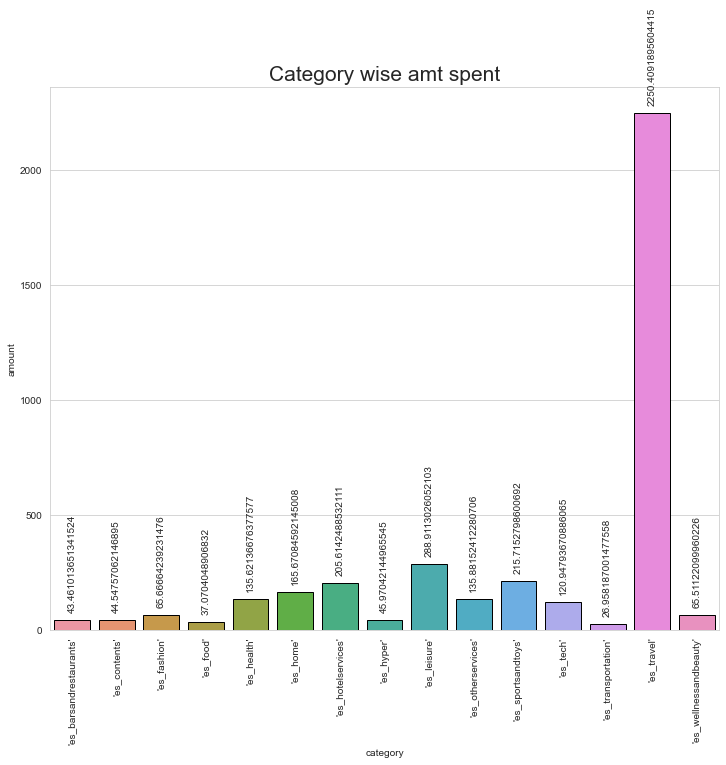

In [35]:
plt.figure(figsize=(12,10))
sns.barplot(df10.index,df10.amount,data=df10,ec="black")
plt.xticks(rotation=90)
plt.title("Category wise amt spent", fontsize=21)
def addlabels_5(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+40, y[i], ha = 'center',rotation=90)
addlabels_5(df10.index,df10.amount)

In [36]:
df11=pd.DataFrame(data.groupby('gender')['amount','fraud'].mean())
df11

<ipython-input-36-967a0e5aebff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df11=pd.DataFrame(data.groupby('gender')['amount','fraud'].mean())


,amount,fraud
gender,,
'E',36.627623,0.005942
'F',39.213044,0.014660
'M',36.308094,0.009073
'U',31.508932,0.000000


In [37]:
df12=pd.DataFrame(data.groupby('age')['amount','fraud'].mean())
df12

<ipython-input-37-982b845e2d24>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df12=pd.DataFrame(data.groupby('age')['amount','fraud'].mean())


,amount,fraud
age,,
'0',46.602896,0.019576
'1',37.530909,0.011853
'2',38.358458,0.012514
'3',37.879718,0.011928
'4',38.201522,0.012933
'5',36.426231,0.010951
'6',36.865624,0.009748
'U',36.627623,0.005942


<ipython-input-38-7c84d1f504bd>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plt.plot(data.groupby('gender')['amount','fraud'].mean()['amount'],'r:')
<ipython-input-38-7c84d1f504bd>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plt.plot(data.groupby('category')['amount','fraud'].mean()['amount'],'go-')


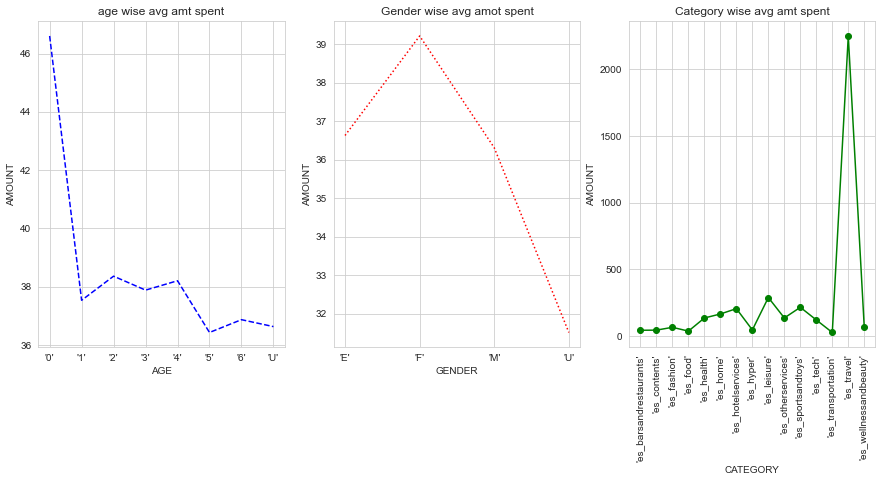

In [38]:
f = plt.figure(figsize=(15,6))
f.add_subplot(131)
plt.plot(df12["amount"],'b--')
plt.title('age wise avg amt spent')
plt.xticks(rotation=0)
plt.xlabel("AGE")
plt.ylabel("AMOUNT")
f.add_subplot(132)
plt.plot(data.groupby('gender')['amount','fraud'].mean()['amount'],'r:')
plt.title('Gender wise avg amot spent')
plt.xticks(rotation=0)
plt.xlabel("GENDER")
plt.ylabel("AMOUNT")
f.add_subplot(133)
plt.plot(data.groupby('category')['amount','fraud'].mean()['amount'],'go-')
plt.title('Category wise avg amt spent')
plt.xticks(rotation=90)
plt.xlabel("CATEGORY")
plt.ylabel("AMOUNT")
plt.show()
f.tight_layout()

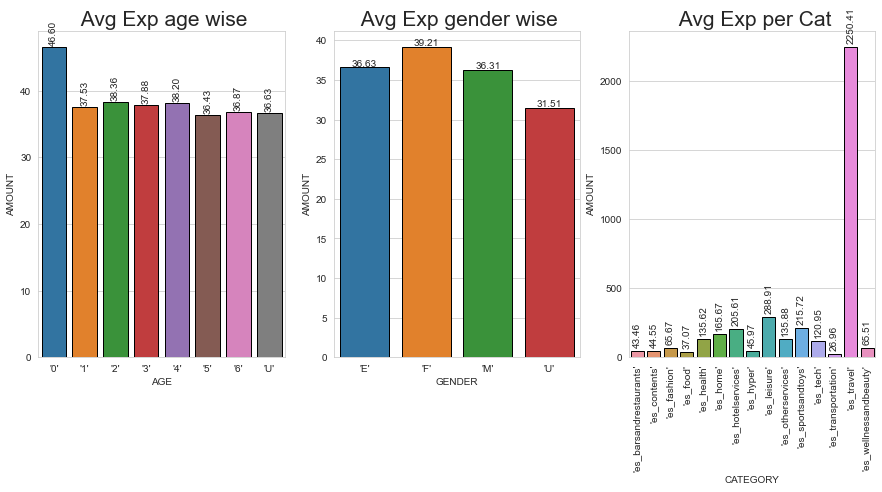

In [39]:
f = plt.figure(figsize=(15,6))
f.add_subplot(131)
sns.barplot(df12.index,df12.amount,data=df12,ec="black")
plt.title(" Avg Exp age wise",fontsize=21)
plt.xticks(rotation=0)
def addlabels_6(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.5, '%.2f'%y[i], ha = 'center',rotation=90)
addlabels_6(df12.index,df12.amount)
plt.xlabel("AGE")
plt.ylabel("AMOUNT")
f.add_subplot(132)
sns.barplot(df11.index,df11.amount,data=df11,ec="black")
plt.title(" Avg Exp gender wise",fontsize=21)
plt.xticks(rotation=0)
def addlabels_7(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.1, '%.2f'%y[i], ha = 'center',rotation=0)
addlabels_7(df11.index,df11.amount)
plt.xlabel("GENDER")
plt.ylabel("AMOUNT")
f.add_subplot(133)
sns.barplot(df10.index,df10.amount,data=df10,ec="black")
plt.xticks(rotation=90)
plt.title(" Avg Exp per Cat",fontsize=21)
def addlabels_5(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+40, '%.2f'%y[i], ha = 'center',rotation=90)
addlabels_5(df10.index,df10.amount)
plt.xlabel("CATEGORY")
plt.ylabel("AMOUNT")
plt.show()
f.tight_layout()

In [40]:
data["amt_int"]=pd.cut(data.amount,bins=[-1,0,500,1000,1500,2000,2500,3000,100000])
data

,step,customer,age,gender,merchant,category,amount,fraud,amt_int
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0,"(0, 500]"
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0,"(0, 500]"
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0,"(0, 500]"
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0,"(0, 500]"
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0,"(0, 500]"
...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','M1823072687','es_transportation',20.53,0,"(0, 500]"
594639,179,'C650108285','4','F','M1823072687','es_transportation',50.73,0,"(0, 500]"
594640,179,'C123623130','2','F','M349281107','es_fashion',22.44,0,"(0, 500]"
594641,179,'C1499363341','5','M','M1823072687','es_transportation',14.46,0,"(0, 500]"


In [41]:
df13=pd.DataFrame(data.groupby('amt_int')['amount','fraud'].mean())
df13["fraud"]=df13["fraud"]*100
df13["nonfraud"]=100-df13["fraud"]
df13.sort_values(by=['amount'], inplace=True)
df13

<ipython-input-41-70ec467bd89e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df13=pd.DataFrame(data.groupby('amt_int')['amount','fraud'].mean())


,amount,fraud,nonfraud
amt_int,,,
"(-1, 0]",0.000000,0.000000,100.000000
"(0, 500]",33.425007,0.864917,99.135083
"(500, 1000]",679.148657,96.264744,3.735256
"(1000, 1500]",1171.380421,90.654206,9.345794
"(1500, 2000]",1764.578750,87.500000,12.500000
"(2000, 2500]",2252.306875,98.437500,1.562500
"(2500, 3000]",2770.648276,100.000000,0.000000
"(3000, 100000]",4487.204820,100.000000,0.000000


In [42]:
df14=pd.DataFrame(data["amt_int"].value_counts())
df14

,amt_int
"(0, 500]",592427
"(500, 1000]",1526
"(3000, 100000]",222
"(1000, 1500]",214
"(1500, 2000]",80
"(2000, 2500]",64
"(2500, 3000]",58
"(-1, 0]",52


In [43]:
#sns.barplot(data=df14,x=df14.index,y='amt_int',ec="black")
#plt.xticks(rotation=90)
#def addlabels_7(x,y):
    #for i in range(len(x)):
        #plt.text(i, y[i]+100, '%.2f'%y[i], ha = 'center',rotation=0)
#addlabels_7(df14.index,df14.amt_int)

Text(0.5, 1.0, 'Fraud % for amt_intervals')

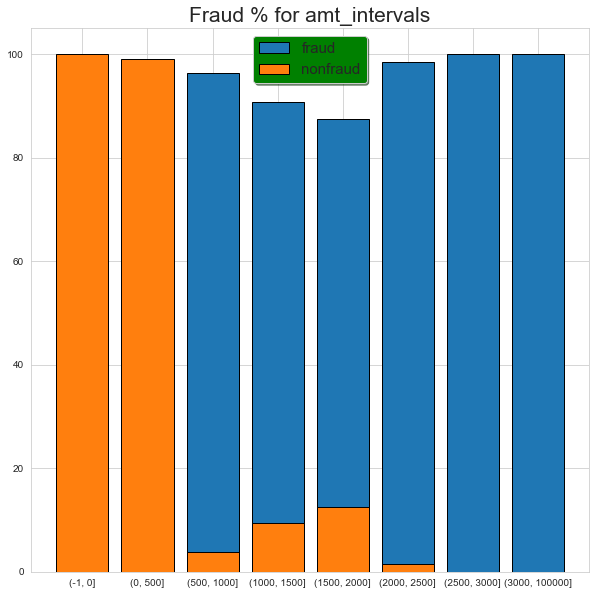

In [44]:
plt.figure(figsize=(10,10))
plt.bar(["(-1, 0]","(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 100000]"],df13.fraud,edgecolor = "black")
plt.bar(["(-1, 0]","(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 100000]"],df13.nonfraud,edgecolor = "black")
plt.legend(["fraud", "nonfraud"],loc='best', prop = {'size' : 15}, shadow = True, facecolor = 'green')
plt.title("Fraud % for amt_intervals",fontsize=21)

In [45]:
df15=pd.DataFrame(pd.cut(data_fraud.amount,bins=[0,250,10000],labels=["1","2"]).value_counts())
df15

,amount
2,4417
1,2783


In [46]:
df16=pd.DataFrame(pd.cut(data_nonfraud.amount,bins=[-1,0,250,1000000000],labels=["1","2","3"]).value_counts())
df16

,amount
2,586298
3,1093
1,52


In [47]:
z=["0","1"]

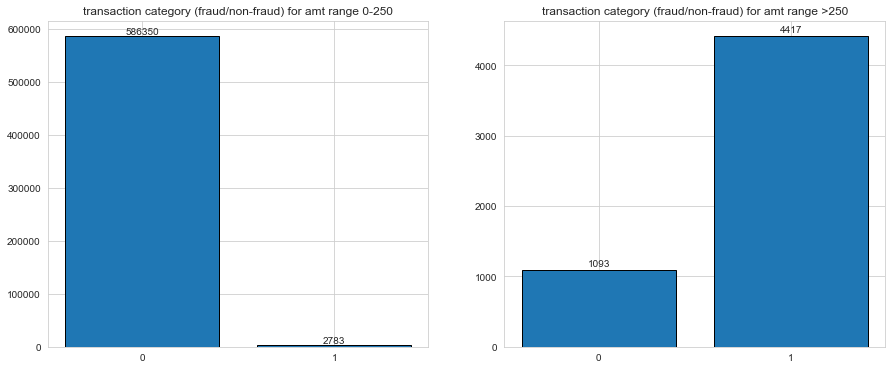

In [48]:
f = plt.figure(figsize=(15,6))
f.add_subplot(121)
plt.bar(z,[df16['amount']["1"]+df16['amount']["2"],df15['amount']["1"]],ec="black")
addlabels(z,[df16['amount']["1"]+df16['amount']["2"],df15['amount']["1"]])
plt.title("transaction category (fraud/non-fraud) for amt range 0-250")
f.add_subplot(122)
plt.bar(z,[df16['amount']["3"],df15['amount']["2"]],ec="black")
addlabels_3(z,[df16['amount']["3"],df15['amount']["2"]])
plt.title("transaction category (fraud/non-fraud) for amt range >250")
plt.show()

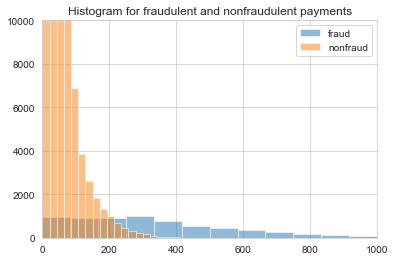

In [49]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(data_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(data_nonfraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

In [57]:
df17=pd.DataFrame(data['merchant'].value_counts())
df17

,merchant
'M1823072687',299693
'M348934600',205426
'M85975013',26254
'M1053599405',6821
'M151143676',6373
'M855959430',6098
'M1946091778',5343
'M1913465890',3988
'M209847108',3814
'M480139044',3508


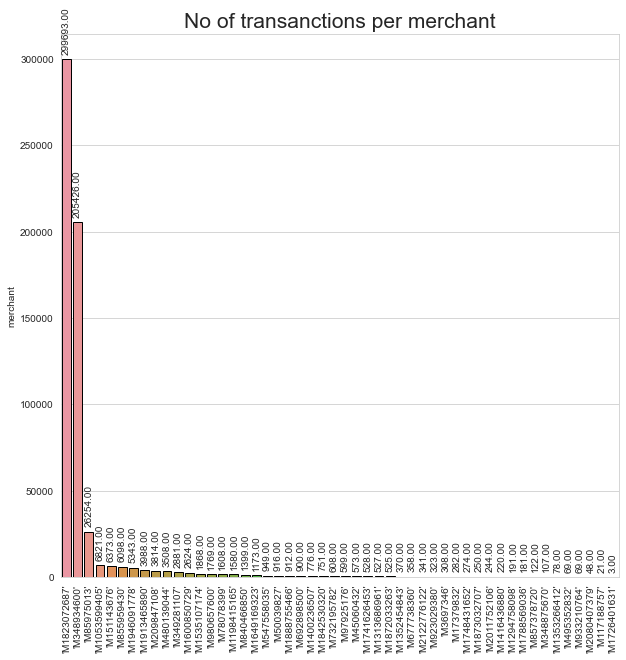

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(df17.index,df17.merchant,data=df17,ec="black")
plt.title("No of transanctions per merchant",fontsize=21)
plt.xticks(rotation=90)
def addlabels_6(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+4000, '%.2f'%y[i], ha = 'center',rotation=90)
addlabels_6(df17.index,df17.merchant)

In [71]:
df18=pd.DataFrame(data_fraud['merchant'].value_counts())
df18

,merchant
'M480139044',1634
'M980657600',1472
'M732195782',518
'M1198415165',358
'M3697346',290
'M855959430',280
'M1888755466',228
'M1873032707',216
'M2122776122',200
'M1741626453',196


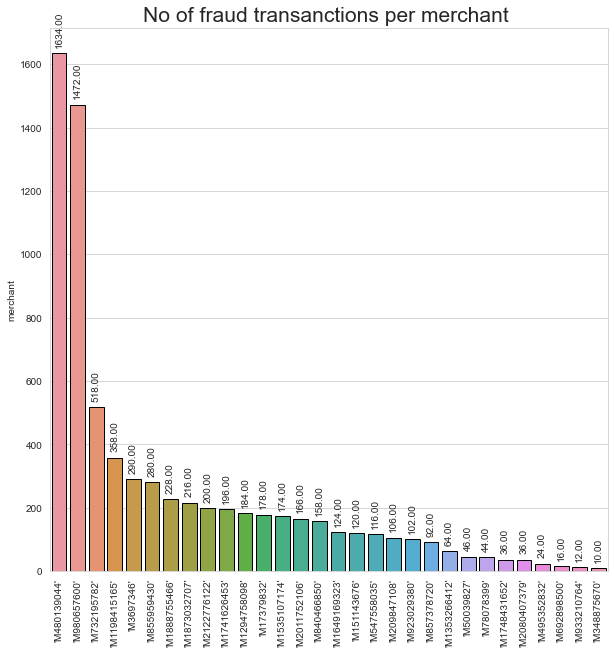

In [77]:
plt.figure(figsize=(10,10))
sns.barplot(df18.index,df18.merchant,data=df18,ec="black")
plt.title("No of fraud transanctions per merchant ",fontsize=21)
plt.xticks(rotation=90)
def addlabels_6(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+25, '%.2f'%y[i], ha = 'center',rotation=90)
addlabels_6(df18.index,df18.merchant)

In [78]:
df19=pd.DataFrame(data_nonfraud['merchant'].value_counts())
df19

,merchant
'M1823072687',299693
'M348934600',205426
'M85975013',26254
'M1053599405',6821
'M151143676',6253
'M855959430',5818
'M1946091778',5343
'M1913465890',3988
'M209847108',3708
'M349281107',2881


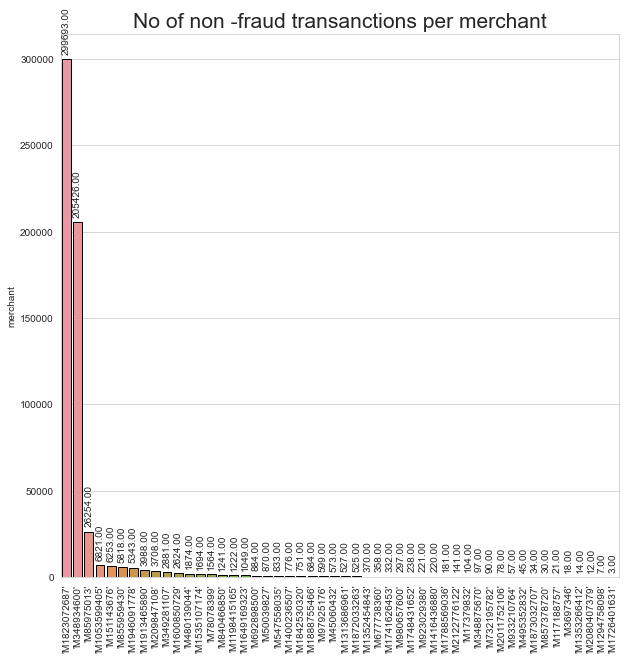

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(df19.index,df19.merchant,data=df19,ec="black")
plt.title("No of non -fraud transanctions per merchant",fontsize=21)
plt.xticks(rotation=90)
def addlabels_6(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+4000, '%.2f'%y[i], ha = 'center',rotation=90)
addlabels_6(df19.index,df19.merchant)

In [102]:
df20=pd.DataFrame(data.groupby('merchant')['amount','fraud'].mean())
df20["fraud"]=df20["fraud"]*100
df20["nonfraud"]=100-df20["fraud"]
df20.sort_values(by=['amount'], inplace=True)
df20

<ipython-input-102-a4530ff80d54>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df20=pd.DataFrame(data.groupby('merchant')['amount','fraud'].mean())


,amount,fraud,nonfraud
merchant,,,
'M1823072687',26.953146,0.000000,100.000000
'M348934600',26.965542,0.000000,100.000000
'M85975013',37.070405,0.000000,100.000000
'M151143676',43.461014,1.882944,98.117056
'M677738360',44.479832,0.000000,100.000000
'M1313686961',44.593586,0.000000,100.000000
'M855959430',45.970421,4.591669,95.408331
'M97925176',56.637796,0.000000,100.000000
'M1946091778',57.067848,0.000000,100.000000


Text(0.5, 1.0, 'Fraud % for merchants')

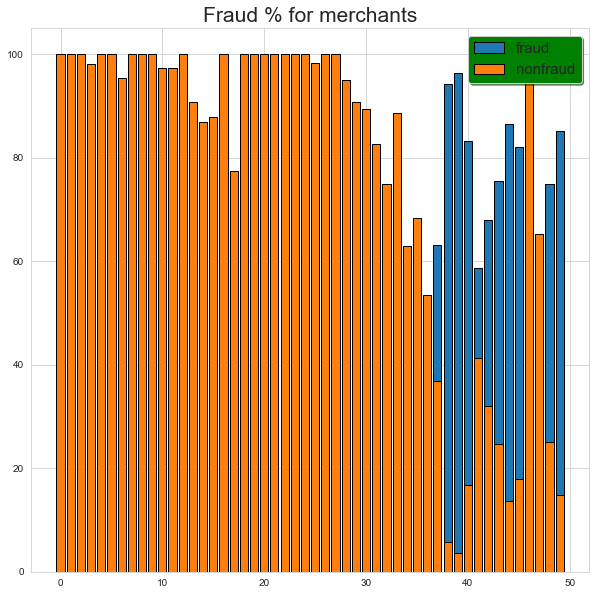

In [104]:
plt.figure(figsize=(10,10))
plt.bar(range(50),df20.fraud,edgecolor = "black")
plt.bar(range(50),df20.nonfraud,edgecolor = "black")
plt.legend(["fraud", "nonfraud"],loc='best', prop = {'size' : 15}, shadow = True, facecolor = 'green')
plt.title("Fraud % for merchants",fontsize=21)